# Google Play Store Data Analysis

## Step 1: Import Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


## Step 2: Data Cleaning

In [15]:
# Step 2: Data Cleaning

import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\kanag\Downloads\googleplaystore.csv")
print("Initial shape:", df.shape)

# Display first few rows
print("First 5 rows:")
print(df.head())

# Check info and missing values
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

# Handle missing values
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df.dropna(inplace=True)  # Drop remaining minimal nulls

# Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Clean Size column
def convert_size(size_str):
    if 'Varies' in size_str:
        return np.nan
    if 'M' in size_str:
        return float(size_str.replace('M', ''))
    if 'k' in size_str:
        return float(size_str.replace('k', '')) / 1024
    try:
        return float(size_str)
    except:
        return np.nan

df['Size'] = df['Size'].astype(str).apply(convert_size)

# Clean Installs column
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Clean Price column
df['Price'] = df['Price'].astype(str).str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Remove duplicates
print("\nNumber of duplicates before cleaning:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicates after cleaning:", df.duplicated().sum())

# Final check
print("\nCleaned shape:", df.shape)
print("Data types:\n", df.dtypes)


Initial shape: (10841, 13)
First 5 rows:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018       

## Step 3: Basic Information

In [9]:

print("\nDataset Summary:\n", df.describe())
print("Unique categories:", df['Category'].nunique())
print("Unique content ratings:", df['Content Rating'].nunique())
print("Unique app types:", df['Type'].nunique())



Dataset Summary:
              Rating       Reviews         Size      Installs         Price  \
count  10356.000000  1.035600e+04  8831.000000  1.035600e+04  10356.000000   
mean       4.203727  4.059438e+05    21.287413  1.415913e+07      1.030900   
min        1.000000  0.000000e+00     0.008301  0.000000e+00      0.000000   
25%        4.100000  3.200000e+01     4.700000  1.000000e+03      0.000000   
50%        4.300000  1.683000e+03    13.000000  1.000000e+05      0.000000   
75%        4.500000  4.643825e+04    29.000000  1.000000e+06      0.000000   
max        5.000000  7.815831e+07   100.000000  1.000000e+09    400.000000   
std        0.485617  2.696905e+06    22.540591  8.024331e+07     16.279408   

                        Last Updated  
count                          10356  
mean   2017-11-14 08:53:57.079953664  
min              2010-05-21 00:00:00  
25%              2017-09-02 18:00:00  
50%              2018-05-20 00:00:00  
75%              2018-07-19 00:00:00  
max  

## Step 4: Visualization 1 (Distribution of App Ratings)

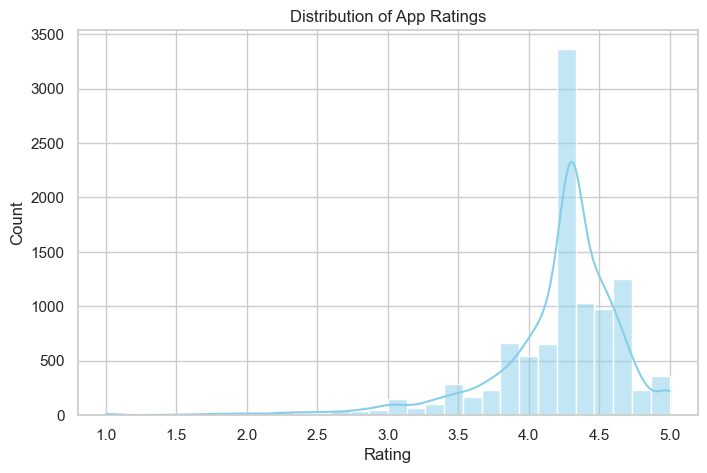

In [22]:

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()

## Step 5: Visualization 2 (Ratings by Content Rating)

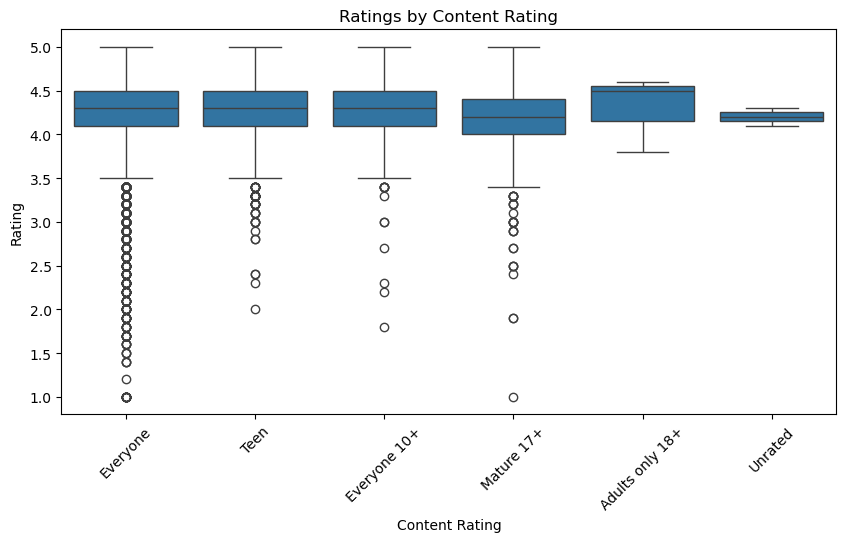

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.title('Ratings by Content Rating')
plt.xticks(rotation=45)
plt.show()

## Step 6: Visualization 3 (Correlation Heatmap)

In [ ]:
plt.figure(figsize=(10, 7))
corr_matrix = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Step 7: Visualization 4 (Top 10 Most Frequent App Categories)

In [ ]:
plt.figure(figsize=(12, 6))
df['Category'].value_counts().nlargest(10).plot(kind='bar', color='coral')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

## Step 8: Central Tendency

In [ ]:

for col in ['Rating', 'Reviews', 'Size', 'Installs', 'Price']:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Std Dev: {df[col].std():.2f}")


## Step 9: Exploratory Data Analysis - 1 (Free vs Paid Apps)

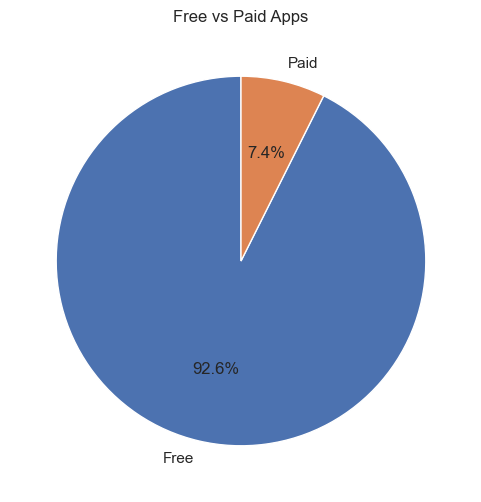

In [37]:

plt.figure(figsize=(6, 6))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Free vs Paid Apps')
plt.ylabel('')
plt.show()

## Step 10 - Exploratory Data Analysis - 2 (Top 10 Apps by Reviews)

In [39]:
top_reviews = df.nlargest(10, 'Reviews')[['App', 'Reviews', 'Rating']]
print("\nTop 10 Apps by Reviews:\n", top_reviews)


Top 10 Apps by Reviews:
                                            App   Reviews  Rating
2544                                  Facebook  78158306     4.1
3943                                  Facebook  78128208     4.1
336                         WhatsApp Messenger  69119316     4.4
3904                        WhatsApp Messenger  69109672     4.4
2604                                 Instagram  66577446     4.5
2545                                 Instagram  66577313     4.5
3909                                 Instagram  66509917     4.5
382   Messenger – Text and Video Chat for Free  56646578     4.0
335   Messenger – Text and Video Chat for Free  56642847     4.0
1879                            Clash of Clans  44893888     4.6


## Step 11 - Exploratory Data Analysis - 3 (Average Rating by Category)

In [41]:
avg_cat_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Category:\n", avg_cat_rating.head(10))


Average Rating by Category:
 Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.336522
PERSONALIZATION        4.327062
PARENTING              4.300000
BEAUTY                 4.283019
GAME                   4.282070
HEALTH_AND_FITNESS     4.266993
SOCIAL                 4.260714
Name: Rating, dtype: float64


## Step 12 - Exploratory Data Analysis - 4 (Price Distribution of Paid Apps)

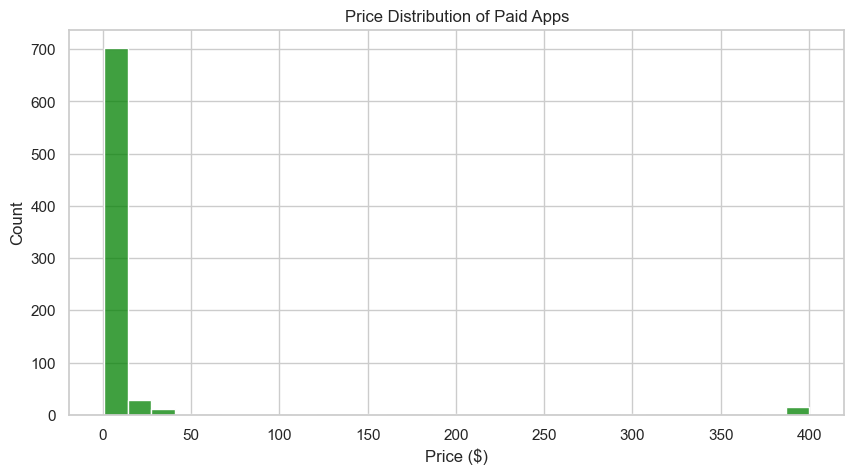

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Type'] == 'Paid']['Price'], bins=30, color='green')
plt.title('Price Distribution of Paid Apps')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

## Step 13: T-Test (Free vs Paid)

In [45]:

free = df[df['Type'] == 'Free']['Rating']
paid = df[df['Type'] == 'Paid']['Rating']
t_stat, p_val = stats.ttest_ind(free, paid, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Significant difference in ratings.")
else:
    print("No significant difference in ratings.")


T-statistic: -3.7783556615196776
P-value: 0.00016845965073930606
Significant difference in ratings.


## Step 14: Z-Test (Sample Mean vs 4.0)

In [ ]:

mean_rating = df['Rating'].mean()
std_rating = df['Rating'].std()
n = len(df)
z = (mean_rating - 4.0) / (std_rating / np.sqrt(n))
p_val_z = stats.norm.sf(abs(z)) * 2
print("Z-score:", z)
print("P-value:", p_val_z)
if p_val_z < 0.05:
    print("Sample mean significantly different from 4.0.")
else:
    print("No significant difference from 4.0.")


## Step 15: Regression Model (Base Features)

In [ ]:

features = ['Reviews', 'Size', 'Installs', 'Price']
target = 'Rating'
reg_df = df[features + [target]].dropna()

X = reg_df[features]
y = reg_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

for f, c in zip(features, lr_model.coef_):
    print(f"{f}: {c:.4f}")

plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='purple')
plt.title('Residuals Plot')
plt.xlabel('Actual Rating')
plt.ylabel('Residuals')
plt.show()

cv_r2 = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_r2)
print("Mean CV R²:", np.mean(cv_r2))


## Step 16: Feature Engineering

In [ ]:

today = pd.to_datetime('2025-01-01')
df['App_Age_Days'] = (today - df['Last Updated']).dt.days
df['Log_Reviews'] = np.log1p(df['Reviews'])
df['Log_Installs'] = np.log1p(df['Installs'])
price_median = df['Price'].median()
df['Is_High_Price'] = (df['Price'] > price_median).astype(int)
df['Size_Bin'] = pd.cut(df['Size'], bins=[0, 10, 30, 100, np.inf],
                        labels=['Small', 'Medium', 'Large', 'Very Large'])
df['Review_Rating_Interaction'] = df['Reviews'] * df['Rating']
size_dummies = pd.get_dummies(df['Size_Bin'], prefix='Size')
df = pd.concat([df, size_dummies], axis=1)


## Step 17: Regression with Feature Engineering and Category

In [ ]:

engineered_features = ['Log_Reviews', 'Log_Installs', 'Price', 'App_Age_Days',
                       'Is_High_Price', 'Review_Rating_Interaction'] + list(size_dummies.columns)
category_dummies = pd.get_dummies(df['Category'], prefix='Cat')
df_full = pd.concat([df, category_dummies], axis=1)
all_feats = engineered_features + list(category_dummies.columns)

reg_df_fe = df_full[all_feats + [target]].dropna()
X_fe = reg_df_fe[all_feats]
y_fe = reg_df_fe[target]

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)
fe_model = LinearRegression()
fe_model.fit(X_train_fe, y_train_fe)
y_pred_fe = fe_model.predict(X_test_fe)

print("R² Score with Feature Engineering:", r2_score(y_test_fe, y_pred_fe))
